In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tcn import TCN

2026-02-23 23:57:22.306038: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 23:57:22.697318: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-23 23:57:24.543956: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [32]:
df = pd.read_csv("Large WTP Data.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Year                                          7305 non-null   int64  
 1   Month                                         7305 non-null   object 
 2   Day                                           7305 non-null   object 
 3   Date                                          7305 non-null   object 
 4   [Raw] Flow [m3/d]                             3947 non-null   float64
 5   [Raw] Alkalinity as CaCO3 [mg/L]              3819 non-null   float64
 6   [Raw] Max Turbidity [NTU]                     4018 non-null   float64
 7   [Raw] Min Turbidity [NTU]                     4018 non-null   float64
 8   [Raw] Mean Turbidity [NTU]                    4018 non-null   float64
 9   [Raw] E.Coli [cfu/100mL]                      1038 non-null   f

In [34]:
df.describe()

,Year,[Raw] Flow [m3/d],[Raw] Alkalinity as CaCO3 [mg/L],[Raw] Max Turbidity [NTU],[Raw] Min Turbidity [NTU],[Raw] Mean Turbidity [NTU],[Raw] E.Coli [cfu/100mL],[Raw] TC [cfu/100mL],[Raw] Temperature [°C],[Raw] DOC [mg/L],...,[TW] Al [mg/L],[TW] Turbidity [NTU],[TW] HAA [ug/L],[TW] THM [ug/L],[TW] TAN [mg/L],[TW] NO3-N [mg/L],[TW] NO2-N [mg/L],[TW] E. Coli [cfu/100mL],[TW] MIB [ug/L],[TW] Geosmin [ug/L]
count,7305.000000,3947.000000,3819.000000,4018.000000,4018.000000,4018.000000,1038.000000,1038.000000,7259.000000,338.000000,...,7293.000000,2.626000e+03,34.000000,82.000000,601.000000,627.000000,627.000000,1047.000000,229.000000,229.000000
mean,2015.500342,55568.951355,106.292223,15.673472,6.347949,9.853624,9.564547,103.235067,12.284119,1.956509,...,0.072437,7.062884e+03,5.767647,16.719146,0.311281,0.448118,0.040000,0.002865,3.091703,3.502183
std,5.766617,18699.188944,13.734412,23.096651,8.425706,12.523306,29.897755,269.081900,8.799912,0.386150,...,1.325002,1.172398e+05,1.862341,8.583324,0.132597,0.229536,0.050153,0.069079,0.610846,1.798207
min,2006.000000,6.000000,12.000000,0.090000,0.040000,0.060000,0.000000,0.000000,0.030000,0.900000,...,0.000000,0.000000e+00,3.800000,0.370000,0.010000,0.020000,0.000000,0.000000,3.000000,3.000000
25%,2011.000000,41157.000000,100.000000,4.600000,2.300000,3.300000,2.000000,16.000000,3.400000,2.000000,...,0.020000,3.000000e-02,5.300000,9.050000,0.250000,0.300000,0.000000,0.000000,3.000000,3.000000
50%,2016.000000,53958.000000,105.000000,7.700000,3.500000,5.100000,2.000000,44.000000,11.830000,2.000000,...,0.041000,4.000000e-02,5.300000,15.200000,0.310000,0.420000,0.000000,0.000000,3.000000,3.000000
75%,2020.000000,68429.500000,115.000000,17.400000,6.700000,10.680000,10.000000,90.000000,21.200000,2.000000,...,0.074000,7.000000e-02,5.300000,23.850000,0.370000,0.600000,0.100000,0.000000,3.000000,3.000000
max,2025.000000,173209.000000,170.000000,603.000000,197.000000,180.000000,670.000000,4000.000000,27.800000,3.000000,...,113.000000,3.682944e+06,14.300000,35.000000,1.410000,1.620000,0.200000,2.000000,10.000000,17.000000


In [35]:
df.head()

,Year,Month,Day,Date,[Raw] Flow [m3/d],[Raw] Alkalinity as CaCO3 [mg/L],[Raw] Max Turbidity [NTU],[Raw] Min Turbidity [NTU],[Raw] Mean Turbidity [NTU],[Raw] E.Coli [cfu/100mL],...,[TW] Al [mg/L],[TW] Turbidity [NTU],[TW] HAA [ug/L],[TW] THM [ug/L],[TW] TAN [mg/L],[TW] NO3-N [mg/L],[TW] NO2-N [mg/L],[TW] E. Coli [cfu/100mL],[TW] MIB [ug/L],[TW] Geosmin [ug/L]
0,2006,Jan,Sun,1/1/2006,NaN,110.0,NaN,NaN,NaN,NaN,...,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,Jan,Mon,1/2/2006,NaN,105.0,NaN,NaN,NaN,NaN,...,0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006,Jan,Tue,1/3/2006,NaN,100.0,NaN,NaN,NaN,56.0,...,0.008,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2006,Jan,Wed,1/4/2006,NaN,100.0,NaN,NaN,NaN,NaN,...,0.020,NaN,NaN,NaN,0.4,0.42,0.0,NaN,NaN,NaN
4,2006,Jan,Thu,1/5/2006,NaN,105.0,NaN,NaN,NaN,NaN,...,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.columns

Index(['Year', 'Month', 'Day', 'Date', '[Raw] Flow [m3/d]',
       '[Raw] Alkalinity as CaCO3 [mg/L]', '[Raw] Max Turbidity [NTU]',
       '[Raw] Min Turbidity [NTU]', '[Raw] Mean Turbidity [NTU]',
       '[Raw] E.Coli [cfu/100mL]', '[Raw] TC [cfu/100mL]',
       '[Raw] Temperature [°C]', '[Raw] DOC [mg/L]', '[Raw] TOC [mg/L]',
       '[Raw] pH [-]', '[Raw] TAN [mg/L]', '[Raw] NO3-N [mg/L]',
       '[Raw] NO2-N [mg/L]', '[Raw] MIB [ng/L]', '[Raw] Geosmin [ng/L]',
       '[Chem] Powdered Activated Carbon Dose [mg/L]',
       '[Chem] Alum Dose [mg/L]', '[Chem] Polyaluminum Chloride Dose [mg/L]',
       '[Chem] Polymer Dosage [mg/L]', '[Filt] Max Turbidity [NTU]',
       '[Filt] Mean Turbidity [NTU]', '[Filt] Total Runtime [h]',
       '[Filt] Backwash Volume [m3]', '[TW] Flow [m3/d]',
       '[TW] Alkalinity as CaCO3 [mg/L]', '[TW] Cl Dosage [mg/L]',
       '[TW] pH [-]', '[TW] Al [mg/L]', '[TW] Turbidity [NTU]',
       '[TW] HAA [ug/L]', '[TW] THM [ug/L]', '[TW] TAN [mg/L]',
       '[TW

In [37]:
def DataSplit(raw_data: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    # [7] 
    raw_data = pd.read_csv(raw_data, encoding="latin1") 
    raw_data["Date"] = pd.to_datetime(raw_data["Date"])
    train_df = raw_data[raw_data["Date"].dt.year < 2025].copy()
    test_df  = raw_data[raw_data["Date"].dt.year == 2025].copy()
    return train_df, test_df
    

6940 train days (2015-2024), 365 test days (2025)

In [39]:
train_data = DataSplit("Large WTP Data.csv")[0]
test_data = DataSplit("Large WTP Data.csv")[1]

In [38]:
def DataProcessing(input_file: pd.DataFrame) -> pd.DataFrame:
# [1] Take original data
# [2] start March 1st 2015
# [3] make sure all features are numerical (e.g., cos(date)) 
# [4] take only features of interest (i.e., remove the TW data, old aluminum input)  
# [5] add masked + prev mesured features for each column/feature 
# [6] forward filling
# [7] split train/test
# [8] set up tuple (window, prediction)

    # [1]
    df_copy = input_file.copy()
    
    # [2] 
    df_copy["Date"] = pd.to_datetime(df_copy["Date"])
    start_date = pd.to_datetime("2015-03-01")
    start_idx = df_copy[df_copy["Date"] >= start_date].index[0] #first index where date is greater than or equal to start date
    df_copy = df_copy.loc[start_idx:].copy()
    
    # [3]
    days_in_year = np.where(df_copy["Date"].dt.is_leap_year, 366, 365)
    theta = 2 * np.pi * df_copy["Date"].dt.dayofyear / days_in_year
    df_copy.insert((df_copy.columns.get_loc("Date")+1), "Date_cos", np.cos(theta))
    df_copy.insert((df_copy.columns.get_loc("Date")+2), "Date_sin", np.sin(theta))

    # [4] 
    df_copy.drop(columns = "[Chem] Alum Dose [mg/L]", inplace = True) #old aluminum input
    downstream_feaures = df_copy.columns.get_loc("[Filt] Total Runtime [h]")
    initial_features = df_copy.columns.get_loc("Date_cos")
    df_copy = df_copy.iloc[:, initial_features:downstream_feaures].copy()

    # [5]
    original_cols = list(df_copy.columns)
    i = 0

    while i < len(original_cols):
        col = original_cols[i]
        insert_pos = df_copy.columns.get_loc(col) + 1
        mask = df_copy[col].notna().astype(int)  

        pos = pd.Series(np.arange(len(df_copy)), index=df_copy.index)
        last_pos = pos.where(df_copy[col].notna()).ffill()
        prev = (pos - last_pos).where(~df_copy[col].notna(), 0).fillna(0).astype(int)

        df_copy.insert(insert_pos, f"{col}_mask", mask)
        df_copy.insert(insert_pos + 1, f"{col}_previouslymeasured", prev)
        i += 1

    # [6]
    df_copy[original_cols] = df_copy[original_cols].ffill() #should this be done

    return df_copy
    

In [43]:
new_df = DataProcessing(train_data)
new_df.head()

,Date_cos,Date_cos_mask,Date_cos_previouslymeasured,Date_sin,Date_sin_mask,Date_sin_previouslymeasured,[Raw] Flow [m3/d],[Raw] Flow [m3/d]_mask,[Raw] Flow [m3/d]_previouslymeasured,[Raw] Alkalinity as CaCO3 [mg/L],...,[Chem] Polyaluminum Chloride Dose [mg/L]_previouslymeasured,[Chem] Polymer Dosage [mg/L],[Chem] Polymer Dosage [mg/L]_mask,[Chem] Polymer Dosage [mg/L]_previouslymeasured,[Filt] Max Turbidity [NTU],[Filt] Max Turbidity [NTU]_mask,[Filt] Max Turbidity [NTU]_previouslymeasured,[Filt] Mean Turbidity [NTU],[Filt] Mean Turbidity [NTU]_mask,[Filt] Mean Turbidity [NTU]_previouslymeasured
3346,0.512371,1,0,0.858764,1,0,42775.0,1,0,90.0,...,0,0.09,1,0,0.11,1,0,0.04,1,0
3347,0.497513,1,0,0.867456,1,0,43162.0,1,0,110.0,...,0,0.09,1,0,0.13,1,0,0.05,1,0
3348,0.482508,1,0,0.875892,1,0,44067.0,1,0,110.0,...,0,0.09,1,0,0.12,1,0,0.04,1,0
3349,0.467359,1,0,0.884068,1,0,37610.0,1,0,100.0,...,0,0.08,1,0,0.19,1,0,0.04,1,0
3350,0.452072,1,0,0.891981,1,0,42270.0,1,0,100.0,...,0,0.07,1,0,0.12,1,0,0.07,1,0


In [ ]:
def SlidingWindowWithTarget(df, window_size, shift_step, target_col)-> list[tuple[pd.DataFrame, float]]:
    # [8]

    # X = []# y = []
    data = []

    i = 0
    while i + window_size < df.shape[0]:
        window = df.iloc[i:i+window_size, :] #up to, not including the target day
        target_value = df.iloc[i+window_size][target_col]  
        
        # X.append(window) # y.append(target_value)
        data.append((window, target_value))
        
        i += shift_step

    return data

In [52]:
train_windows = SlidingWindowWithTarget(new_df, window_size=7, shift_step=1, target_col="[Filt] Mean Turbidity [NTU]")
test_windows = SlidingWindowWithTarget(DataProcessing(test_data), window_size=7, shift_step=1, target_col="[Filt] Mean Turbidity [NTU]")

Model Training

In [50]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error)
from sklearn.metrics import r2_score


In [51]:
def get_regression_metrics(model, X, y_true):
    """
    Get a dicionary with regression metrics:

    model: sklearn model with predict method
    X: feature matrix
    y_true: ground truth labels
    """
    # Get predictions from the model using the provided features X
    y_predicted = model.predict(X)

    # Calculate the regression metrics using sklearn.metrics functions
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    maximum_error = max_error(y_true, y_predicted)
    mape =  mean_absolute_percentage_error(y_true, y_predicted)

    # Store the calculated metrics in a dictionary
    metrics_dict = {
        'mae': mae,
        'mse': mse,
        'max_error': maximum_error,
        'mape': mape
    }

    return metrics_dict

In [53]:
import xgboost as xgb

In [54]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

In [ ]:
#separate features and target values for training
train_values = [train_windows[i][1] for i in range(len(train_windows))]
train_features = [train_windows[i][0].values.flatten() for i in range(len(train_windows))]

In [73]:
test_values = [test_windows[i][1] for i in range(len(test_windows))]
test_features = [test_windows[i][0].values.flatten() for i in range(len(test_windows))]

In [81]:
# Train XGBoost model on all training data
xgb_model.fit(train_features, train_values)
xgb_train_results = get_regression_metrics(xgb_model, train_features, train_values)
xgb_test_results = get_regression_metrics(xgb_model, test_features, test_values)

In [82]:
print("train:",xgb_train_results)
print("test:",xgb_test_results)

train: {'mae': 0.002267815638333559, 'mse': 9.613246220396832e-06, 'max_error': 0.019673049002885818, 'mape': 0.06028281897306442}
test: {'mae': 0.022059457376599312, 'mse': 0.0020654425024986267, 'max_error': 0.5231143307685852, 'mape': 0.39647287130355835}


In [78]:
# Calculate R² scores for both training and test sets
train_r2 = r2_score(train_values, train_predictions)
test_r2 = r2_score(test_values, xgb_model.predict(test_features))

print(f"Training R² Score: {train_r2:.6f}")
print(f"Test R² Score: {test_r2:.6f}")

Training R² Score: 0.989831
Test R² Score: -0.547919


Hyperparameter tuning

scatterplots (should go in EDA)

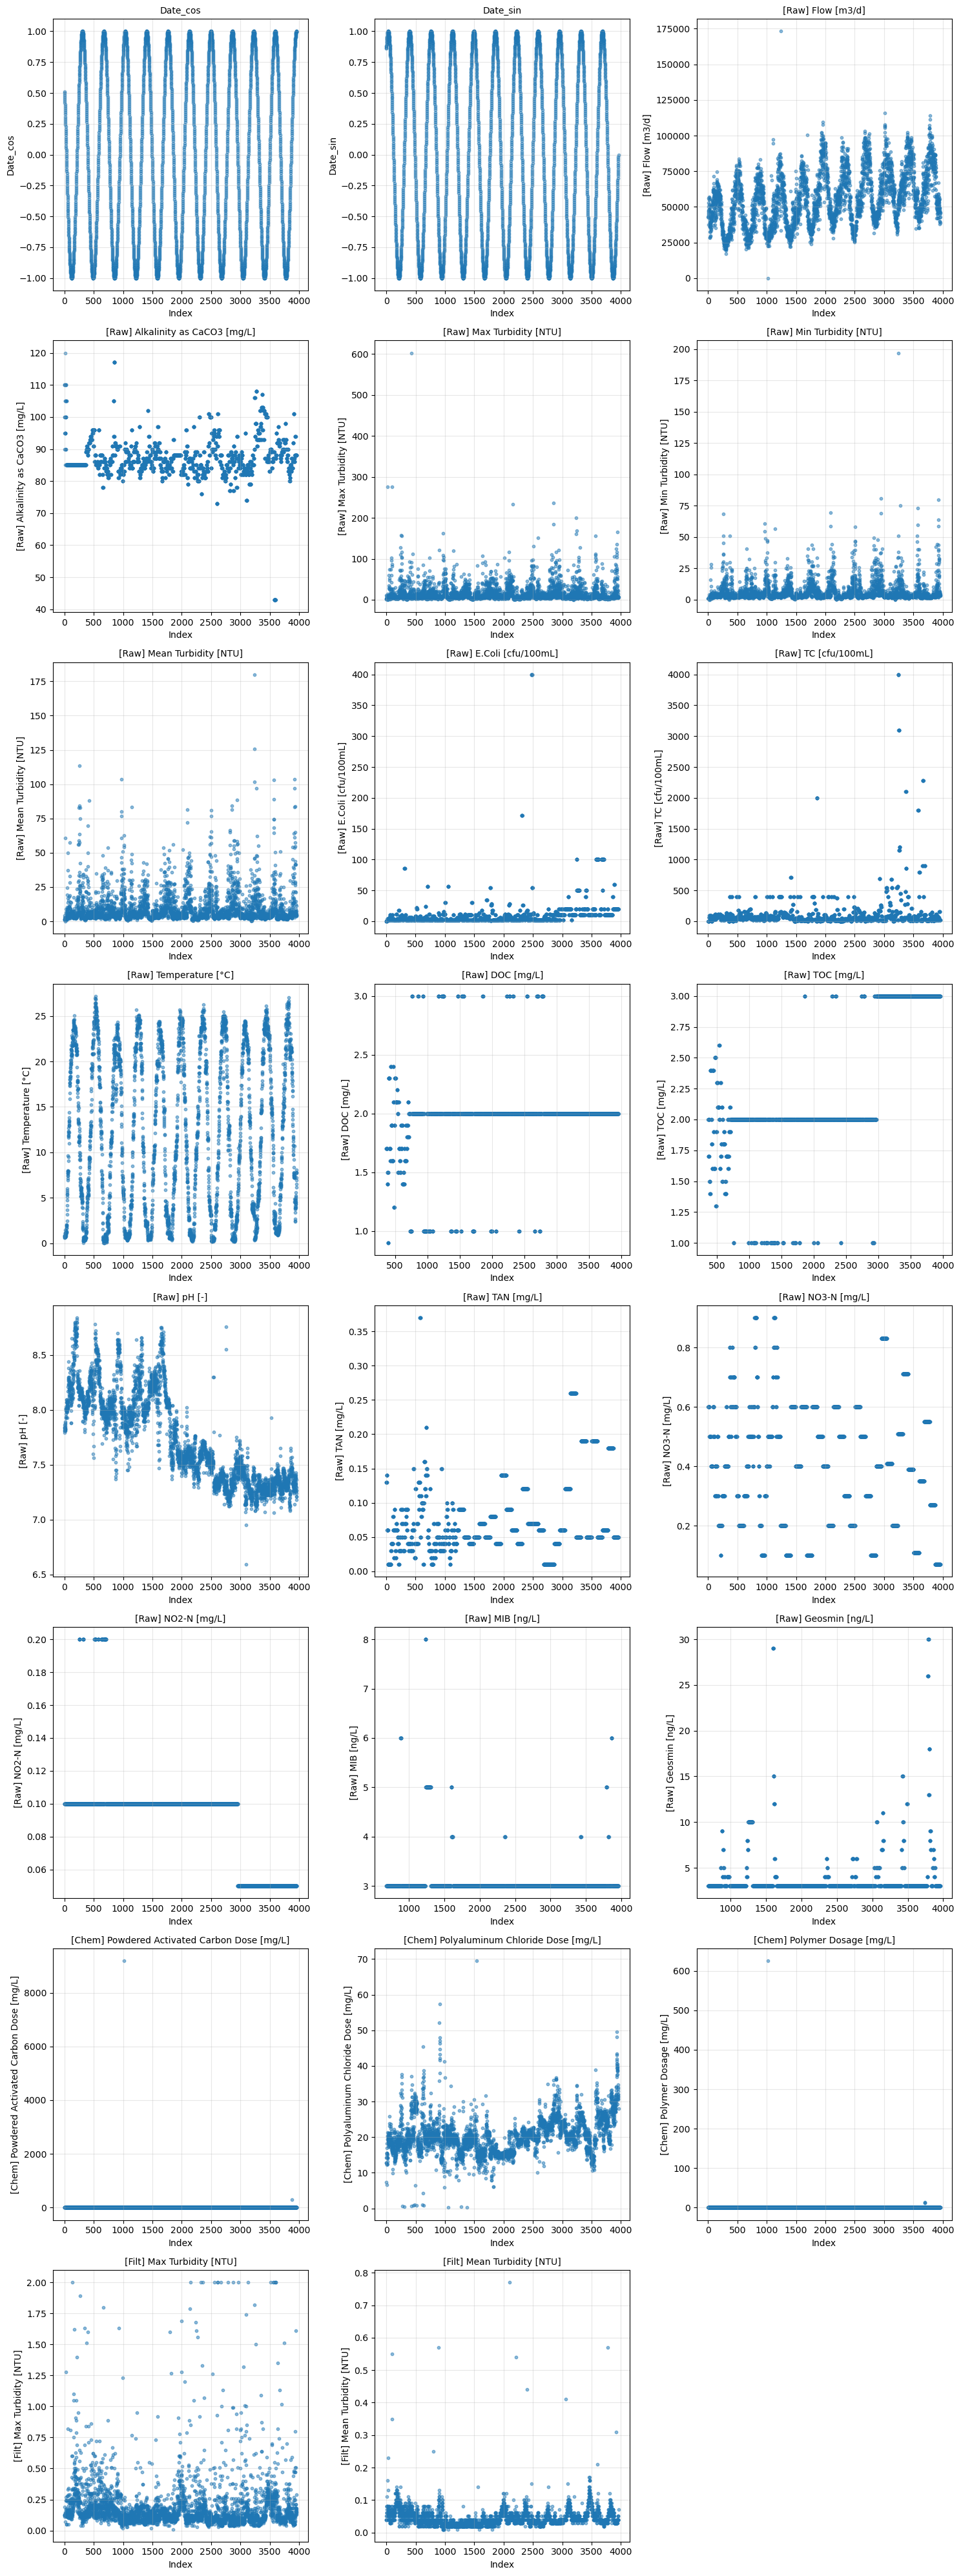

In [29]:
import matplotlib.pyplot as plt

# Get columns excluding mask and previouslymeasured variables
plot_cols = [col for col in new_df.columns if '_mask' not in col and '_previouslymeasured' not in col]

# Create figure with subplots
n_cols = len(plot_cols)
n_rows = (n_cols + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(plot_cols):
    axes[i].scatter(range(len(new_df)), new_df[col], alpha=0.5, s=10)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(plot_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

mask and previously measured scatterplots

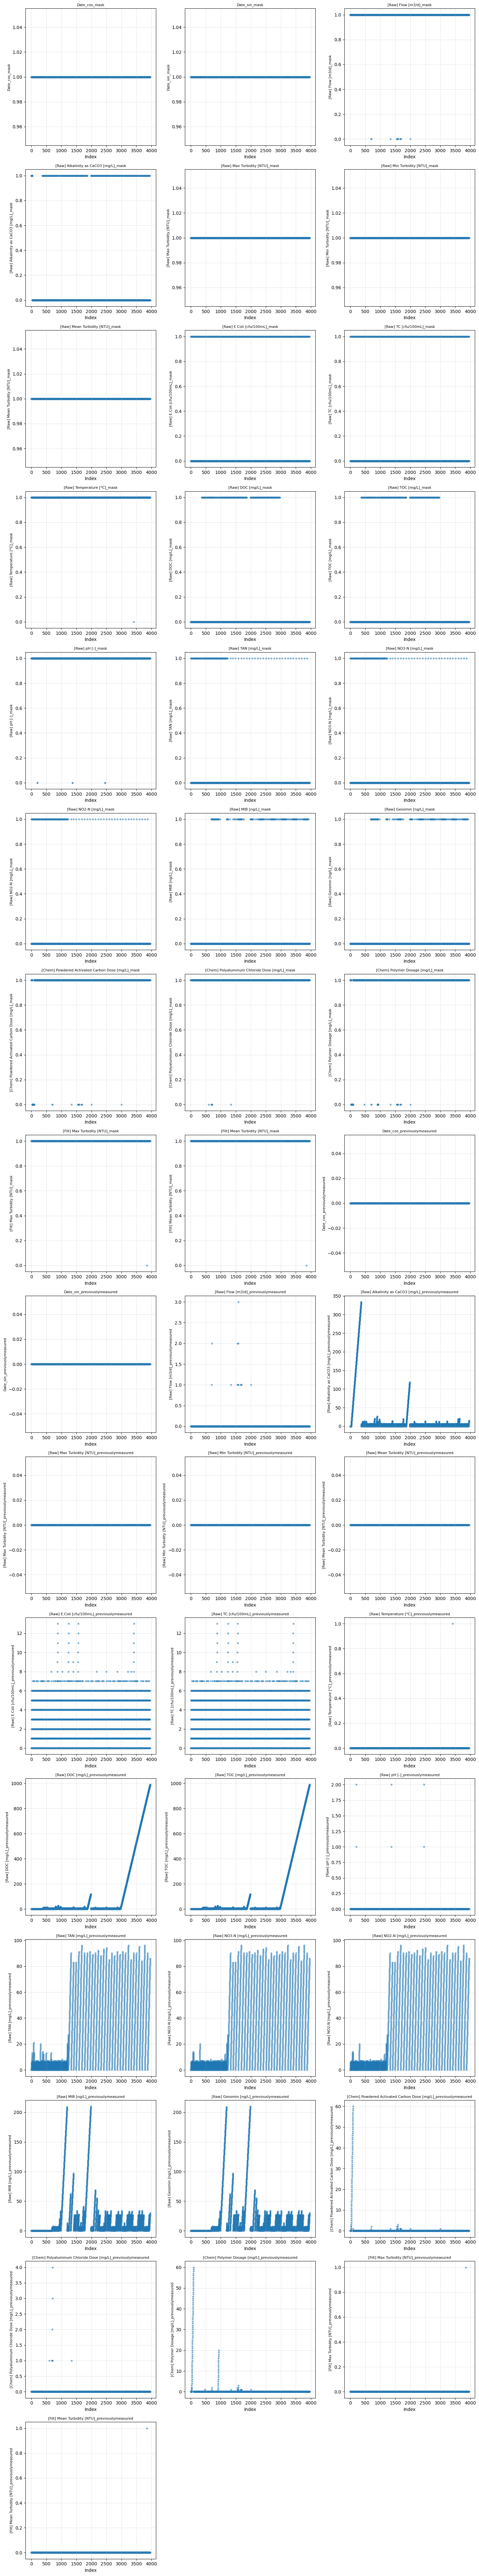

In [30]:
# Get columns for mask and previouslymeasured variables only
mask_cols = [col for col in new_df.columns if '_mask' in col]
prev_cols = [col for col in new_df.columns if '_previouslymeasured' in col]
plot_cols_filtered = mask_cols + prev_cols

# Create figure with subplots
n_cols = len(plot_cols_filtered)
n_rows = (n_cols + 2) // 3  # 3 columns per row
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(plot_cols_filtered):
    axes[i].scatter(range(len(new_df)), new_df[col], alpha=0.5, s=10)
    axes[i].set_title(col, fontsize=8)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col, fontsize=8)
    axes[i].grid(True, alpha=0.3)

# Hide extra subplots
for i in range(len(plot_cols_filtered), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()